In [ ]:
# sunshine = 2,0
c1=0
c2=3
c3=4
LNB1=LONB[:,c1][LONB[:,c1]!=0]
LTB1=LATB[:,c1][LATB[:,c1]!=0]
CDB1=CODB[:,c1][CODB[:,c1]!=0]
ATB1=ALTB[:,c1][ALTB[:,c1]!=0]
print [LNB1.size,LTB1.size,CDB1.size,ATB1.size]
LNB2=LONB[:,c2][LONB[:,c2]!=0]
LTB2=LATB[:,c2][LATB[:,c2]!=0]
CDB2=CODB[:,c2][CODB[:,c2]!=0]
ATB2=ALTB[:,c2][ALTB[:,c2]!=0]
print [LNB2.size,LTB2.size,CDB2.size,ATB2.size]
# precip = 0,1
c1=0
c2=1
LNL1=LONL[:,c1][LONL[:,c1]!=0]
LTL1=LATL[:,c1][LATL[:,c1]!=0]
CDL1=CODL[:,c1][CODL[:,c1]!=0]
ATL1=ALTL[:,c1][ALTL[:,c1]!=0]
print [LNL1.size,LTL1.size,CDL1.size,ATL1.size]
LNL2=LONL[:,c2][LONL[:,c2]!=0]
LTL2=LATL[:,c2][LATL[:,c2]!=0]
CDL2=CODL[:,c2][CODL[:,c2]!=0]
ATL2=ALTL[:,c2][ALTL[:,c2]!=0]
print [LNL2.size,LTL2.size,CDL2.size,ATL2.size]
# rainy days: 2,0
c1=2
c2=0
LND1=LOND[:,c1][LOND[:,c1]!=0]
LTD1=LATD[:,c1][LATD[:,c1]!=0]
CDD1=CODD[:,c1][CODD[:,c1]!=0]
ATD1=ALTD[:,c1][ALTD[:,c1]!=0]
print [LND1.size,LTD1.size,CDD1.size,ATD1.size]
LND2=LOND[:,c2][LOND[:,c2]!=0]
LTD2=LATD[:,c2][LATD[:,c2]!=0]
CDD2=CODD[:,c2][CODD[:,c2]!=0]
ATD2=ALTD[:,c2][ALTD[:,c2]!=0]
print [LND2.size,LTD2.size,CDD2.size,ATD2.size]
# humidity 1,3 (might be the opposite?)
c1=1
c2=3
LNH1=LONH[:,c1][LONH[:,c1]!=0]
LTH1=LATH[:,c1][LATH[:,c1]!=0]
CDH1=CODH[:,c1][CODH[:,c1]!=0]
ATH1=ALTH[:,c1][ALTH[:,c1]!=0]
print [LNH1.size,LTH1.size,CDH1.size,ATH1.size]
LNH2=LONH[:,c2][LONH[:,c2]!=0]
LTH2=LATH[:,c2][LATH[:,c2]!=0]
CDH2=CODH[:,c2][CODH[:,c2]!=0]
ATH2=ALTH[:,c2][ALTH[:,c2]!=0]
print [LNH2.size,LTH2.size,CDH2.size,ATH2.size]

In [ ]:
def mcsel(big,small):
    MC=np.zeros(big)
    for i in range(big):
        MC[i]=np.random.random()<small*1./big
    return MC.astype(bool)

In [ ]:
# stackear D y L y hacer el MC sobre esos
MCclp=np.empty((0))
MClnp=np.empty((0))
MCltp=np.empty((0))
MCatp=np.empty((0))
iterations=10000
for i in range(iterations):
    DMC=mcsel(LND1.size,LNB1.size)
    HMC=mcsel(LNH1.size,LNB1.size)
    LMC=mcsel(LNL1.size,LNB1.size)
    LNMC=np.hstack((LNB1,LND1[DMC],LNH1[HMC],LNL1[LMC]))
    LTMC=np.hstack((LTB1,LTD1[DMC],LTH1[HMC],LTL1[LMC]))
    ATMC=np.hstack((ATB1,ATD1[DMC],ATH1[HMC],ATL1[LMC]))
    CDMC=np.hstack((CDB1,CDD1[DMC],CDH1[HMC],CDL1[LMC]))
    MCdata=np.vstack((LNMC,LTMC,ATMC)).T
    kcomp=2
    kik=0
    kikp=1
    gmm = GMM(kcomp, covariance_type='full', random_state=0)
    gmm.fit(MCdata)
    cluster_label = gmm.predict(MCdata)
    MCcl=np.append(MCcl,CDMC[cluster_label==kik])
    MCln=np.append(MCln,LNMC[cluster_label==kik])
    MClt=np.append(MClt,LTMC[cluster_label==kik])    
    MCat=np.append(MCat,ATMC[cluster_label==kik])
    MCclp=np.append(MCclp,CDMC[cluster_label==kikp])
    MClnp=np.append(MClnp,LNMC[cluster_label==kikp])
    MCltp=np.append(MCltp,LTMC[cluster_label==kikp])    
    MCatp=np.append(MCatp,ATMC[cluster_label==kikp])
   
np.savetxt('mcresults.txt',np.c_[MCcl,MCln,MClt,MCat])
np.savetxt('mcresultsp.txt',np.c_[MCclp,MClnp,MCltp,MCatp])

In [ ]:
%%bash

cat mcresults.txt | sort -n | uniq -c | sort -nr > mcrescount.txt
cat mcresultsp.txt | sort -n | uniq -c | sort -nr > mcrescountp.txt

In [ ]:
A=np.loadtxt('mcrescount.txt')
FILTER=A[:,0]>800
plt.scatter(-A[:, 2][FILTER], -A[:, 3][FILTER], c=A[:,0][FILTER])
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
A=np.loadtxt('mcrescountp.txt')
FILTER=A[:,0]>1000
plt.scatter(-A[:, 2][FILTER], -A[:, 3][FILTER], c=A[:,0][FILTER])
plt.colorbar()
plt.xlim(-85,-65)
plt.ylim(-5,14)

In [ ]:
def genprob(paux3,paux4):
    p3=1./4
    p4=1./16
    p33=p3*paux3
    p34=p4*paux4
    lott=np.random.random(1)
    if(lott<(p33+p34)):
        if(lott<p33):
            return 3
        elif(p33<=lott<p33+p34):
            return 4
    else:
         return 0    

In [ ]:
def parseprob(i,j):
    if((i==4.)&(j==0.)):
        return genprob(0.,1.)
    if((i==3.)&(j==0.)):
        return genprob(1.,0.)
    if((i==3.)&(j==1.)):
        return genprob(4./5,1./5)
    if((i==2.)&(j==1.)):
        return genprob(4./10,0.)
    if((i==2.)&(j==2.)):
        return genprob(4./11,1./11)
    if((i==1.)&(j==2.)):
        return genprob(4./14,0.)
    if((i==1.)&(j==3.)):
        return genprob(4./15,1./15)

In [1]:
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.mixture import GMM

In [65]:
# Contamos cuantas variables fueron medidas por estacion, se almacena en tomados (cuyo indice coincide con el indice de listam)
listam=np.loadtxt('listam.txt')
df=pd.read_csv('lluvia.csv')
tomados=np.zeros((len(listam[:,1]),4))
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,0]+=1
df=pd.read_csv('diaslluvia.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,1]+=1  
df=pd.read_csv('humedad.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,2]+=1
df=pd.read_csv('brillo.csv')
for i in range(len(listam[:,1])):
    for k in range(len(df.CODIGO)):
        if(listam[i,1]==df.CODIGO[k]):
            tomados[i,3]+=1 

In [80]:
listam

array([[  1.00000000e+00,   1.10250100e+07,   7.60841667e+01,
         -5.87833333e+00,   2.10000000e+03],
       [  2.00000000e+00,   1.10750100e+07,   7.61580556e+01,
         -6.35638889e+00,   1.85000000e+03],
       [  2.00000000e+00,   1.10750200e+07,   7.61397222e+01,
         -6.32472222e+00,   1.85000000e+03],
       ..., 
       [  2.00000000e+00,   5.40300900e+07,   7.63166667e+01,
         -4.35000000e+00,   1.75000000e+03],
       [  2.00000000e+00,   5.40301000e+07,   7.62333333e+01,
         -4.66666667e+00,   1.52400000e+03],
       [  2.00000000e+00,   5.40350200e+07,   7.61166667e+01,
         -4.73333333e+00,   1.60000000e+03]])

In [5]:
(tomados[:,0]*336./2046)*(tomados[:,1]*336./445)*(tomados[:,2]*336./2002)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       ..., 
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.]])

In [66]:
LLUVIA=tomados[:,0]+tomados[:,1]

In [67]:
HUBR=tomados[:,2]+tomados[:,3]

In [68]:
tomados[LLUVIA==2]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.]])

In [78]:
tomados[(tomados[:,2]==0)*(tomados[:,3]==1)*(LLUVIA==2)]

array([[ 1.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.]])

In [82]:
listam[(tomados[:,2]==0)*(tomados[:,3]==1)*(LLUVIA==2),0]

array([ 1.,  3.])

In [56]:
tomados[(LLUVIA[LLUVIA==2]+BRHUM[LLUVIA==2])==3]

array([[ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.]])

In [47]:
((tomados[:,2]==1)*(tomados[:,1]==1)*(tomados[:,3]==1)).sum()

92

In [16]:
ptom=336./np.array([2046.,445.,2002.,336.])
ptom

array([ 0.16422287,  0.75505618,  0.16783217,  1.        ])

In [19]:
pmed=np.zeros(len(listam[:,1]))
for i in range(len(listam[:,1])):
    pmed[i]=1.
    for k in range(4):
        if(tomados[i,k]==1.):
            pmed[i]=pmed[i]*ptom[k]

In [25]:
np.argmax(pmed)

103

In [27]:
tomados[np.argmax(pmed)]

array([ 1.,  0.,  0.,  0.])

In [31]:
np.unique(pmed/pmed.min())

array([ 1.        ,  1.32440476,  5.95833333,  7.89124504])

(array([ 123.,  377.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    8.]),
 array([ 1.        ,  1.22970817,  1.45941634,  1.6891245 ,  1.91883267,
         2.14854084,  2.37824901,  2.60795718,  2.83766534,  3.06737351,
         3.29708168,  3.52678985,  3.75649802,  3.98620618,  4.21591435,
         4.44562252,  4.67533069,  4.90503886,  5.13474702,  5.36445519,
         5.59416336,  5.82387153,  6.0535797 ,  6.28328786,  6.51299603,
         6.7427042 ,  6.97241237,  7.20212054,  7.4318287 ,  7.66153687,
         7.89124504]),
 <a list of 30 Patch objects>)

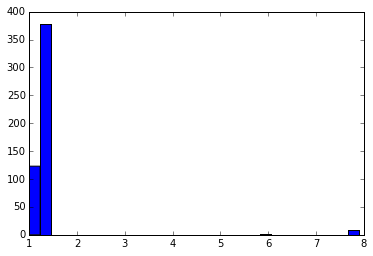

In [33]:
plt.hist(pmed/pmed.min(), bins=30)

In [29]:
pmed/pmed.min()

array([ 1.        ,  1.        ,  1.        ,  1.32440476,  1.        ,
        1.        ,  1.        ,  1.        ,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.        ,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.        ,  1.32440476,  1.32440476,
        1.        ,  1.32440476,  1.32440476,  1.32440476,  1.        ,
        1.32440476,  1.        ,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.        ,
        1.32440476,  1.        ,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32440476,
        1.32440476,  1.32440476,  1.32440476,  1.32440476,  1.32